In [1]:
import torch

In [2]:
x= torch.rand(2,5)

In [3]:
x

tensor([[0.9288, 0.0724, 0.4483, 0.4969, 0.2393],
        [0.6733, 0.9960, 0.4035, 0.6444, 0.8471]])

In [4]:
torch.zeros(4,5).scatter_(0,torch.LongTensor([[0,1,2,0,0],[2,0,0,1,1]]),x)

tensor([[0.9288, 0.9960, 0.4035, 0.4969, 0.2393],
        [0.0000, 0.0724, 0.0000, 0.6444, 0.8471],
        [0.6733, 0.0000, 0.4483, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000]])

In [5]:
torch.zeros(4,5).scatter_(0,torch.LongTensor([[0,1,2,0,0],[2,0,0,0,0]]),x)

tensor([[0.9288, 0.9960, 0.4035, 0.6444, 0.8471],
        [0.0000, 0.0724, 0.0000, 0.0000, 0.0000],
        [0.6733, 0.0000, 0.4483, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000]])

In [6]:
z = torch.zeros(3, 4).scatter_(1, torch.LongTensor([[2], [3],[1]]), 1.23)

In [7]:
z

tensor([[0.0000, 0.0000, 1.2300, 0.0000],
        [0.0000, 0.0000, 0.0000, 1.2300],
        [0.0000, 1.2300, 0.0000, 0.0000]])

In [8]:
import torch as t
import numpy as np

batch_size = 8
class_num = 10
label = np.random.randint(0,class_num,size=(batch_size,1))
label = t.LongTensor(label)


In [9]:
y_one_hot = t.zeros(batch_size,class_num).scatter_(1,label,1)
label

tensor([[6],
        [2],
        [2],
        [2],
        [3],
        [5],
        [0],
        [0]])

In [10]:
y_one_hot

tensor([[0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
        [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [11]:
gt = np.random.randint(0,5,size=[2,2])

In [12]:
gt = torch.LongTensor(gt)

In [13]:
gt

tensor([[3, 4],
        [3, 4]])

In [14]:
label = gt
size=list (label.size())

In [15]:
size

[2, 2]

In [16]:
label = label.view(-1)

In [17]:
label

tensor([3, 4, 3, 4])

In [18]:
ones=torch.sparse.torch.eye(5)

In [19]:
ones

tensor([[1., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0.],
        [0., 0., 1., 0., 0.],
        [0., 0., 0., 1., 0.],
        [0., 0., 0., 0., 1.]])

In [20]:
ones=ones.index_select(0,label)

In [21]:
ones

tensor([[0., 0., 0., 1., 0.],
        [0., 0., 0., 0., 1.],
        [0., 0., 0., 1., 0.],
        [0., 0., 0., 0., 1.]])

In [22]:
ones.size()

torch.Size([4, 5])

In [23]:
size.append(5)

In [24]:
returns = ones.view(*size)

In [25]:
returns.size()

torch.Size([2, 2, 5])

In [26]:
returns

tensor([[[0., 0., 0., 1., 0.],
         [0., 0., 0., 0., 1.]],

        [[0., 0., 0., 1., 0.],
         [0., 0., 0., 0., 1.]]])

In [27]:
from PIL import Image

In [28]:
label_png = Image.open("./dataSet/img_train/labels/img0_20240924_161642.png")
pic = label_png

In [29]:
label_png.size

(640, 480)

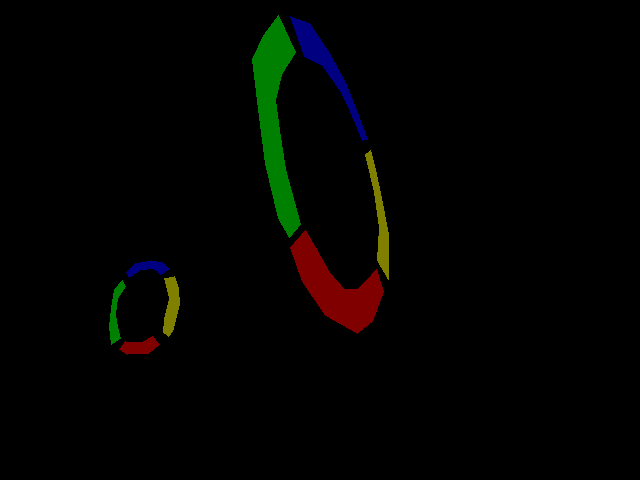

In [30]:
label_png

In [31]:
label_png = np.array(label_png)
label_png.dtype

dtype('uint8')

In [32]:

num_classes = 5
label_png[label_png >= num_classes] =num_classes

In [33]:
# np.size(label_png)
label_png.dtype

dtype('uint8')

In [34]:
seg_labels = np.eye(num_classes)[label_png.reshape([-1])]
seg_labels.dtype

dtype('float64')

In [35]:
# print(seg_labels)
# pic[0]

In [36]:
seg_labels = seg_labels.reshape(pic.width,pic.height,num_classes)


In [37]:
seg_labels.dtype

dtype('float64')

In [38]:
seg_labels=torch.from_numpy(seg_labels).long()

In [39]:
seg_labels.shape

torch.Size([640, 480, 5])

In [40]:
torch.set_printoptions(profile="full")
# seg_labels

In [41]:
image_png = Image.open("./dataSet/img_train/imgs/img0_20240924_161642.png")
height = image_png.height
width = image_png.width

In [42]:
image_png = np.array(image_png).reshape(height,width,1)
image_png.shape



(480, 640, 1)

In [43]:
image_png

array([[[ 19],
        [ 19],
        [ 19],
        ...,
        [ 43],
        [ 45],
        [ 49]],

       [[ 19],
        [ 19],
        [ 19],
        ...,
        [ 46],
        [ 49],
        [ 55]],

       [[ 19],
        [ 19],
        [ 19],
        ...,
        [ 49],
        [ 54],
        [ 60]],

       ...,

       [[ 50],
        [ 50],
        [ 51],
        ...,
        [107],
        [106],
        [106]],

       [[ 51],
        [ 51],
        [ 51],
        ...,
        [101],
        [101],
        [101]],

       [[ 50],
        [ 50],
        [ 50],
        ...,
        [105],
        [105],
        [104]]], dtype=uint8)

In [44]:
# image_png=torch.tensor(image_png)

In [45]:
# image_png= image_png.permute(2,0,1)

In [46]:
# image_png

In [47]:
import torchvision.transforms as tf

In [48]:
image_png=tf.ToTensor()(image_png)

In [49]:
# image_png

In [50]:
# tf1 = tf.Compose([tf.ToTensor()])

In [51]:
# image_png = tf1(image_png)

In [52]:
image_png

tensor([[[0.0745, 0.0745, 0.0745, 0.0745, 0.0745, 0.0745, 0.0745, 0.0745,
          0.0745, 0.0745, 0.0745, 0.0745, 0.0745, 0.0745, 0.0745, 0.0745,
          0.0745, 0.0745, 0.0745, 0.0745, 0.0745, 0.0745, 0.0745, 0.0745,
          0.0745, 0.0745, 0.0745, 0.0745, 0.0745, 0.0745, 0.0745, 0.0745,
          0.0745, 0.0745, 0.0745, 0.0745, 0.0745, 0.0745, 0.0745, 0.0745,
          0.0745, 0.0745, 0.0745, 0.0745, 0.0745, 0.0745, 0.0745, 0.0745,
          0.0706, 0.0745, 0.0745, 0.0745, 0.0745, 0.0745, 0.0745, 0.0745,
          0.0745, 0.0745, 0.0745, 0.0784, 0.0784, 0.0784, 0.0784, 0.0784,
          0.0784, 0.0784, 0.0784, 0.0784, 0.0784, 0.0784, 0.0784, 0.0784,
          0.0784, 0.0784, 0.0784, 0.0784, 0.0784, 0.0784, 0.0784, 0.0784,
          0.0784, 0.0784, 0.0824, 0.0784, 0.0784, 0.0784, 0.0784, 0.0784,
          0.0784, 0.0784, 0.0784, 0.0784, 0.0784, 0.0784, 0.0784, 0.0784,
          0.0784, 0.0824, 0.0824, 0.0784, 0.0784, 0.0824, 0.0824, 0.0824,
          0.0824, 0.0824, 0.0824, 0.08

In [53]:
image_png.shape

torch.Size([1, 480, 640])